In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", context="notebook")
#plt.style.use('dark_background')

In [2]:
def get_quantile(df, q_num=4):
    d = df.copy()
    d['Q'] = pd.qcut(d['mean'], q_num, labels=False)
    return d

In [3]:
def get_grouped_desc_2(file):
    desc = pd.read_csv(file, sep=';', index_col='id', skipinitialspace=True)
    desc.head()
    
    volume = desc[desc['desc'].str.match('Volume')]
    area = desc[desc['desc'].str.match('Area')]
    grey_white = desc[desc['desc'].str.match('Grey-white')]
    mean_thickness = desc[desc['desc'].str.match('Mean thickness')]
    mean_intensity = desc[desc['desc'].str.match('Mean intensity')]

    return {
            'volume':volume, 
            'area':area, 
            'grey white':grey_white, 
            'mean thickness':mean_thickness,
            'mean intensity': mean_intensity}

In [4]:
def get_grouped_desc(desc_file, multi_r2, multi_mse, name='result', write_result=False):
    desc = pd.read_csv(desc_file, index_col='id')
    r2 = pd.read_csv(multi_r2).iloc[[-1]].T # select the last entry
    mse = pd.read_csv(multi_mse).iloc[[-1]].T

    mse.columns =['mse']
    mse.index.name = 'id'
    mse.index = mse.index.astype(int)

    r2.columns=['r2']
    r2.index.name = 'id'
    r2.index = r2.index.astype(int)

    joined = r2.join(mse, on='id', how='left')
    desc = desc.join(joined, on='id', how='left')

    if write_result:
        desc.to_csv('results/'+name+'.csv', sep=';',doublequote=False, escapechar='\t')

    volume = desc[desc['desc'].str.match('Volume')]
    area = desc[desc['desc'].str.match('Area')]
    grey_white = desc[desc['desc'].str.match('Grey-white')]
    mean_thickness = desc[desc['desc'].str.match('Mean thickness')]
    mean_intensity = desc[desc['desc'].str.match('Mean intensity')]

    # print('total : {}'.format(volume.shape[0] + area.shape[0] + grey_white.shape[0] + mean_thickness.shape[0] + mean_intensity.shape[0]))
    return {
        'volume':volume, 
        'area':area, 
        'grey white':grey_white, 
        'mean thickness':mean_thickness,
        'mean intensity': mean_intensity}

In [5]:
def boxplot(result_list, names, q_num=4, group='volume', title=''):
    q = list()
    for i in range(len(result_list)):
        df = get_quantile(result_list[i][group], q_num=q_num)
        df['model'] = names[i]
        q.append(df[['r2', 'mse', 'Q', 'model']].reset_index(drop=True))

    ret = q[0]
    for i in range(1, len(q)):
        ret = pd.concat([ret, q[i]], axis=0)
    
    fig, ax = plt.subplots(ncols=1, nrows=1)

    #sns.boxplot(data=ret, x='Q', y='r2', hue='model', ax=ax[0])
    sns.boxplot(data=ret, x='Q', y='r2', hue='model', ax=ax)
    #sns.boxplot(data=ret, x='Q', y='mse', hue='model', ax=ax[1])   

    fig.set_size_inches(10,5)    
    fig.suptitle(title)
    return ret

In [6]:
desc_file = '../csv/idps_desc.csv'

In [7]:
multi_r2 = 'sfcn_pyramid_avg_nodrop_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_avg_nodrop_test_multi_mse.csv'
sfcn_pyr_avg = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [8]:
multi_r2 = 'sfcn_pyramid_nodrop_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nodrop_test_multi_mse.csv'
sfcn_pyr = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [9]:
multi_r2 = 'sfcn_vanilla_test_multi_r2.csv'
multi_mse = 'sfcn_vanilla_test_multi_mse.csv'
sfcn_vanilla = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [10]:
multi_r2 = 'sfcn_pyramid_nopool_v2_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nopool_v2_test_multi_mse.csv'
sfcn_strides = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [11]:
multi_r2 = 'sfcn_pyramid_nopool_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nopool_test_multi_mse.csv'
sfcn_nopool2 = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [12]:
multi_r2 = 'sfcn_pyramid_small_kern_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_small_kern_test_multi_mse.csv'
sfcn_small_kern = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [13]:
multi_r2 = 'sfcn_pyramid_big_kern_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_big_kern_test_multi_mse.csv'
sfcn_big_kern = get_grouped_desc(desc_file, multi_r2, multi_mse)

# Pooling Types

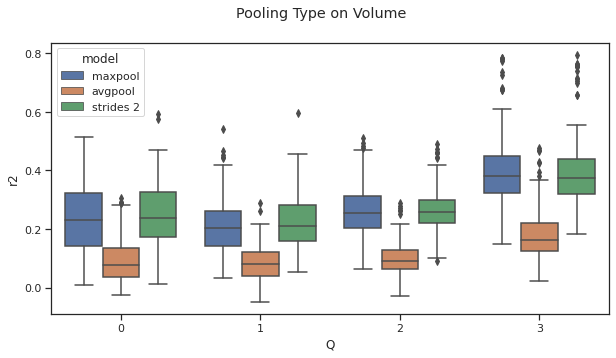

In [14]:
a = boxplot([ sfcn_pyr, sfcn_pyr_avg, sfcn_strides], [ 'maxpool' ,'avgpool', 'strides 2'], title='Pooling Type on Volume')

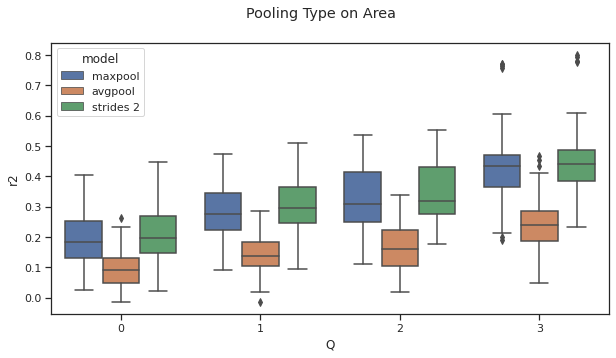

In [15]:
a = boxplot([sfcn_pyr, sfcn_pyr_avg, sfcn_strides], ['maxpool' ,'avgpool', 'strides 2'], group = 'area', title='Pooling Type on Area')

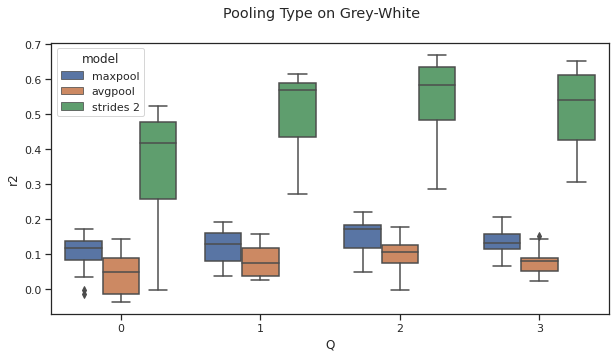

In [16]:
a = boxplot([sfcn_pyr, sfcn_pyr_avg, sfcn_strides], ['maxpool' ,'avgpool', 'strides 2'], group='grey white', title='Pooling Type on Grey-White')


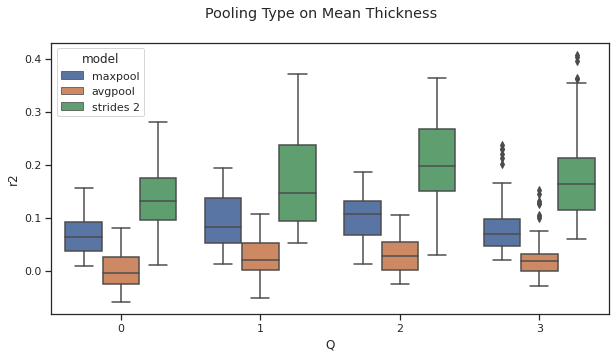

In [17]:
a = boxplot([sfcn_pyr, sfcn_pyr_avg, sfcn_strides], ['maxpool' ,'avgpool', 'strides 2'], group='mean thickness', title='Pooling Type on Mean Thickness')


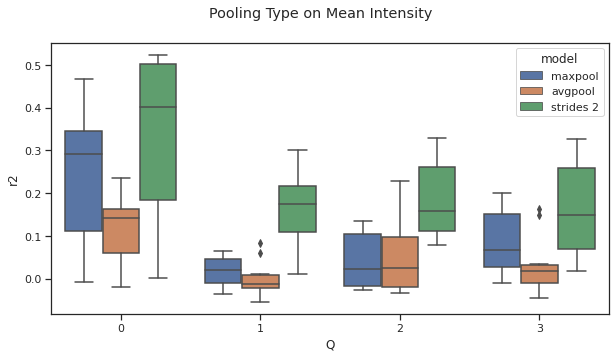

In [18]:
a = boxplot([sfcn_pyr, sfcn_pyr_avg, sfcn_strides ], ['maxpool' ,'avgpool', 'strides 2' ], group='mean intensity', title='Pooling Type on Mean Intensity')


# Kernel Size

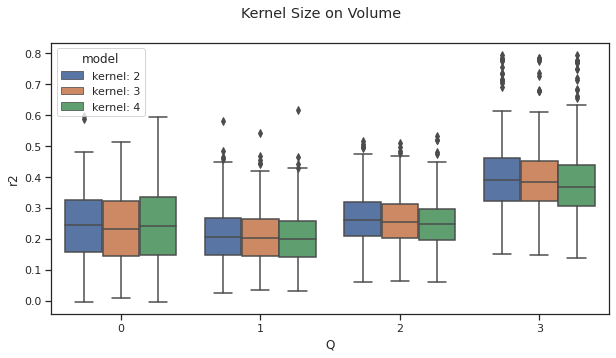

In [19]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], group='volume', title='Kernel Size on Volume')

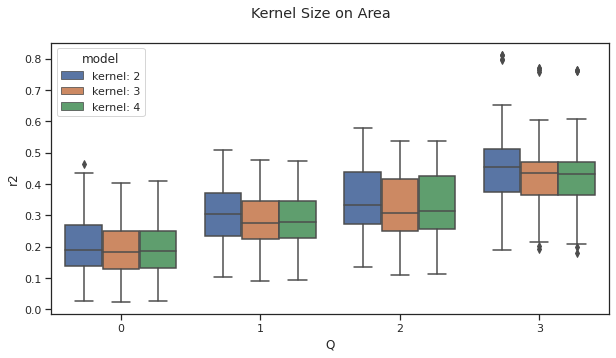

In [20]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], group='area', title='Kernel Size on Area')

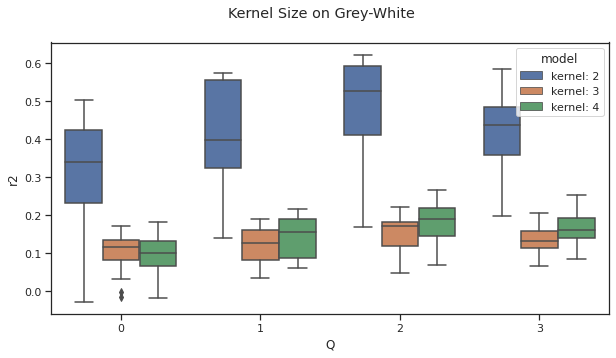

In [21]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], group='grey white', title='Kernel Size on Grey-White')

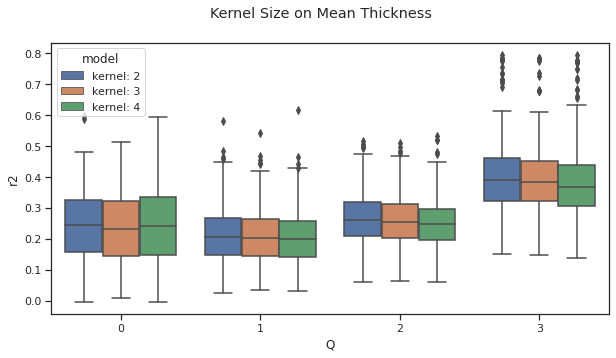

In [22]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], title='Kernel Size on Mean Thickness')

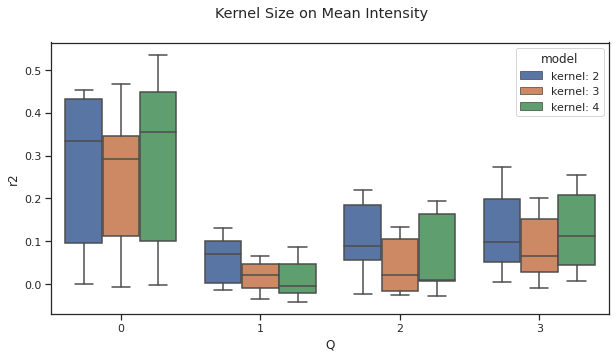

In [23]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], group='mean intensity', title='Kernel Size on Mean Intensity')

# scrathes

In [24]:
multi_r2 = 'sfcn_pyramid_nodrop_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nodrop_test_multi_mse.csv'
sfcn_pyr = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [25]:
multi_r2 = 'sfcn_pyramid_qn_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_qn_test_multi_mse.csv'
sfcn_pyr_avg_qn= get_grouped_desc(desc_file, multi_r2, multi_mse)

In [26]:
multi_r2 = 'sfcn_pyramid_strides2_qn_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_strides2_qn_test_multi_mse.csv'
sfcn_strides_2= get_grouped_desc(desc_file, multi_r2, multi_mse)

In [27]:
multi_r2 = 'sfcn_pyramid_strides3_qn_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_strides3_qn_test_multi_mse.csv'
sfcn_strides_3= get_grouped_desc(desc_file, multi_r2, multi_mse)

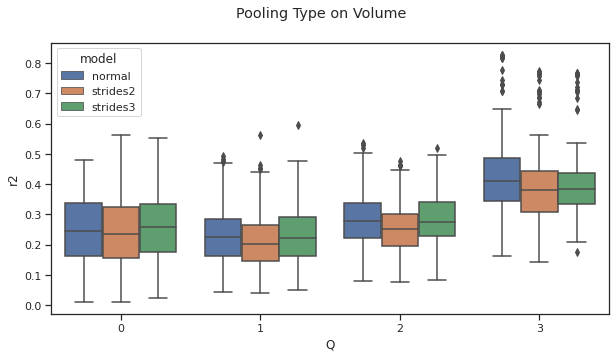

In [28]:
a = boxplot([sfcn_pyr_avg_qn, sfcn_strides_2, sfcn_strides_3], [ 'normal', 'strides2', 'strides3'], title='Pooling Type on Volume')

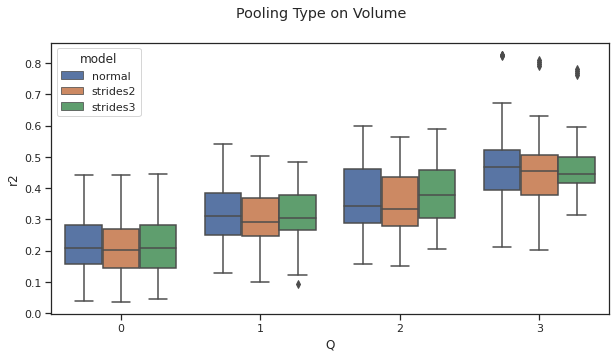

In [29]:
a = boxplot([ sfcn_pyr_avg_qn, sfcn_strides_2, sfcn_strides_3], [ 'normal', 'strides2', 'strides3'], group='area', title='Pooling Type on Volume')

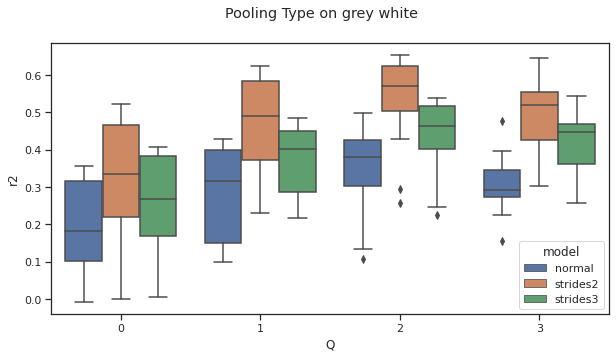

In [30]:
a = boxplot([  sfcn_pyr_avg_qn, sfcn_strides_2, sfcn_strides_3], [ 'normal', 'strides2', 'strides3'], group='grey white', title='Pooling Type on grey white')

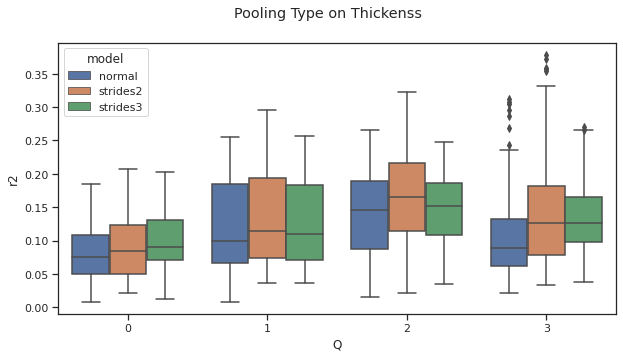

In [31]:
a = boxplot([ sfcn_pyr_avg_qn, sfcn_strides_2, sfcn_strides_3], [ 'normal', 'strides2', 'strides3'], group='mean thickness', title='Pooling Type on Thickenss')

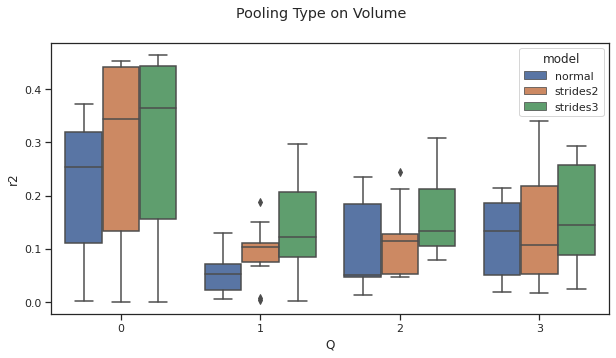

In [32]:
a = boxplot([ sfcn_pyr_avg_qn, sfcn_strides_2, sfcn_strides_3], [ 'normal', 'strides2', 'strides3'], group='mean intensity', title='Pooling Type on Volume')

In [33]:
multi_r2 = 'sfcn_pyramid_small_kern_qn_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_small_kern_qn_test_multi_mse.csv'
small_kern= get_grouped_desc(desc_file, multi_r2, multi_mse)

In [34]:
multi_r2 = 'sfcn_pyramid_big_kern_qn_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_big_kern_qn_test_multi_mse.csv'
big_kern= get_grouped_desc(desc_file, multi_r2, multi_mse)

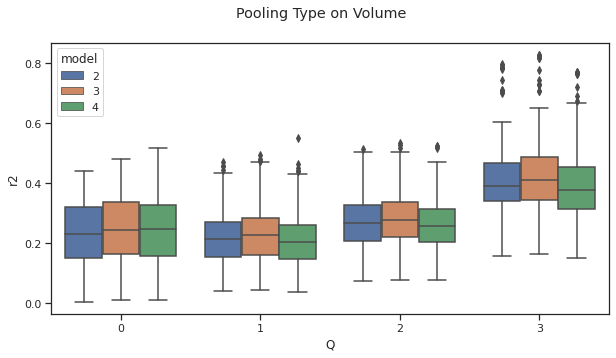

In [35]:
a = boxplot([small_kern, sfcn_pyr_avg_qn, big_kern], [ '2', '3', '4'], title='Pooling Type on Volume')

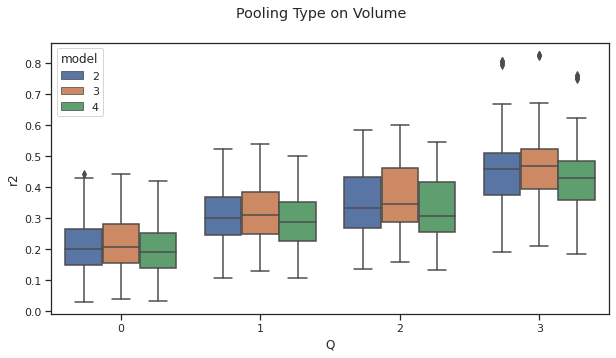

In [36]:
a = boxplot([small_kern, sfcn_pyr_avg_qn, big_kern], [ '2', '3', '4'], group='area', title='Pooling Type on Volume')

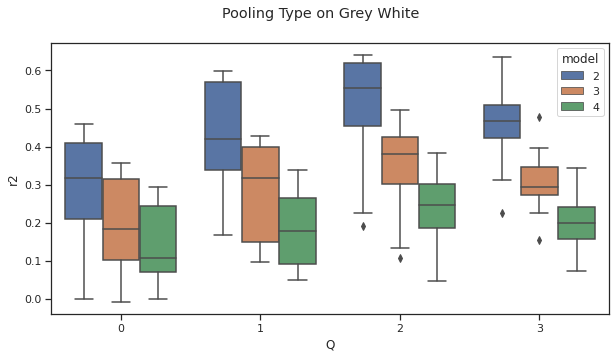

In [37]:
a = boxplot([small_kern, sfcn_pyr_avg_qn, big_kern], [ '2', '3', '4'], group='grey white', title='Pooling Type on Grey White')

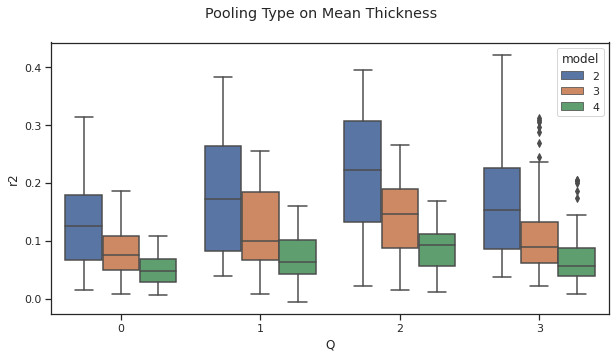

In [38]:
a = boxplot([small_kern, sfcn_pyr_avg_qn, big_kern], [ '2', '3', '4'], group='mean thickness', title='Pooling Type on Mean Thickness')

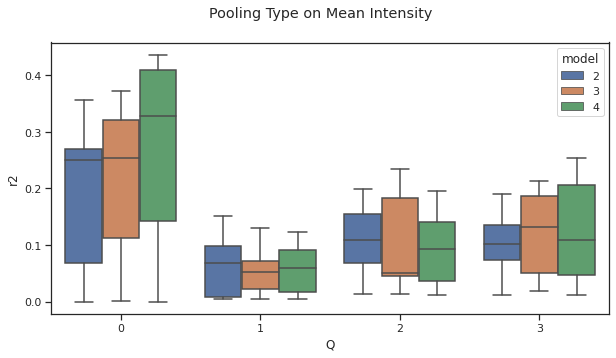

In [39]:
a = boxplot([small_kern, sfcn_pyr_avg_qn, big_kern], [ '2', '3', '4'], group='mean intensity', title='Pooling Type on Mean Intensity')

In [40]:
multi_r2 = 'sfcn_large_nfil_shallow_qn_test_multi_r2.csv'
multi_mse = 'sfcn_large_nfil_shallow_qn_test_multi_mse.csv'
shallow= get_grouped_desc(desc_file, multi_r2, multi_mse)

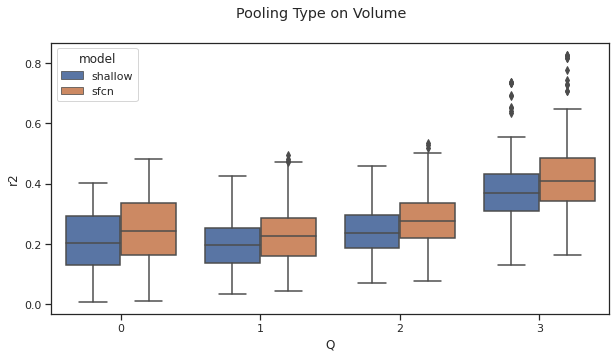

In [41]:
a = boxplot([shallow, sfcn_pyr_avg_qn], [ 'shallow', 'sfcn'], title='Pooling Type on Volume')

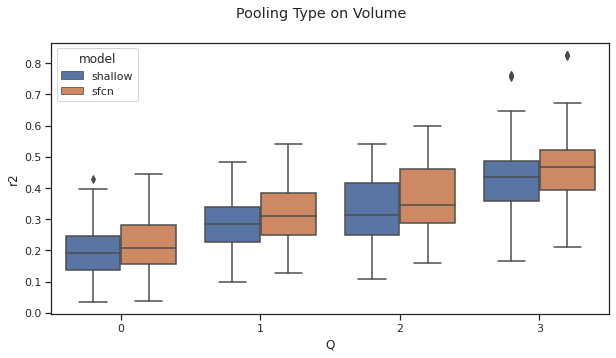

In [42]:
a = boxplot([shallow, sfcn_pyr_avg_qn], [ 'shallow', 'sfcn'], group ='area', title='Pooling Type on Volume')

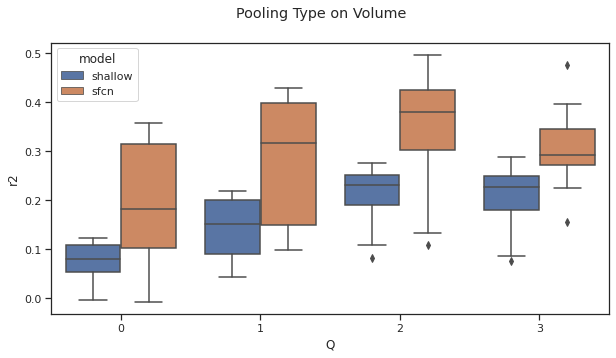

In [43]:
a = boxplot([shallow, sfcn_pyr_avg_qn], [ 'shallow', 'sfcn'], group ='grey white', title='Pooling Type on Volume')

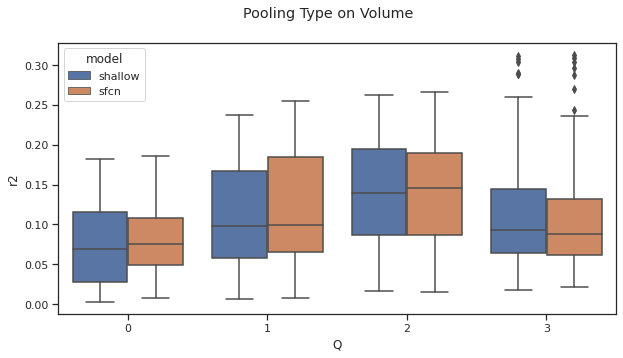

In [44]:
a = boxplot([shallow, sfcn_pyr_avg_qn], [ 'shallow', 'sfcn'], group ='mean thickness', title='Pooling Type on Volume')

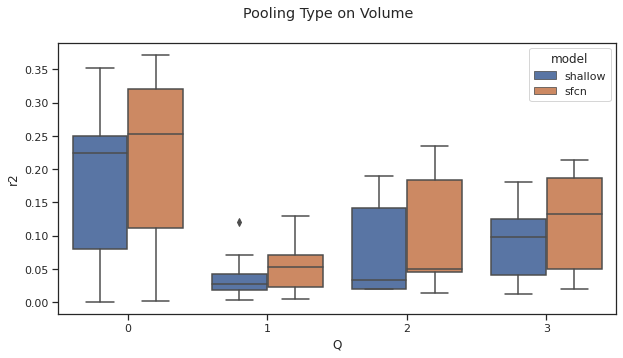

In [45]:
a = boxplot([shallow, sfcn_pyr_avg_qn], [ 'shallow', 'sfcn'], group ='mean intensity', title='Pooling Type on Volume')

In [77]:
multi_r2 = 'sfcn_pyramid_nodrop_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nodrop_test_multi_mse.csv'
sfcn = get_grouped_desc(desc_file, multi_r2, multi_mse)

# multi_r2 = 'sfcn_vanilla_test_multi_r2.csv'
# multi_mse = 'sfcn_vanilla_test_multi_mse.csv'
# sfcn = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [47]:
multi_r2 = 'sfcn_large_nfil_shallow_0_qn_test_multi_r2.csv'
multi_mse = 'sfcn_large_nfil_shallow_0_qn_test_multi_mse.csv'
shallow0= get_grouped_desc(desc_file, multi_r2, multi_mse)

In [48]:
multi_r2 = 'sfcn_large_nfil_shallow_1_qn_test_multi_r2.csv'
multi_mse = 'sfcn_large_nfil_shallow_1_qn_test_multi_mse.csv'
shallow1= get_grouped_desc(desc_file, multi_r2, multi_mse)

In [49]:
multi_r2 = 'sfcn_large_nfil_shallow_2_qn_test_multi_r2.csv'
multi_mse = 'sfcn_large_nfil_shallow_2_qn_test_multi_mse.csv'
shallow2= get_grouped_desc(desc_file, multi_r2, multi_mse)

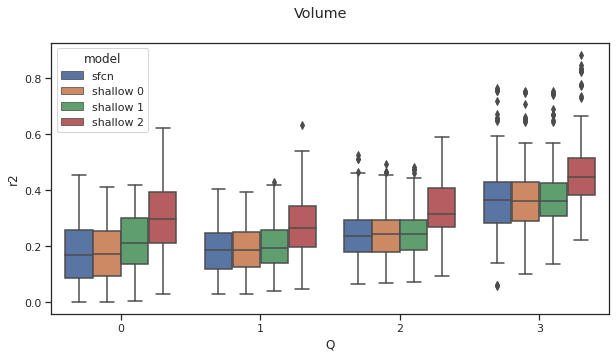

In [50]:
a = boxplot([sfcn, shallow0, shallow1, shallow2], [ 'sfcn', 'shallow 0', 'shallow 1', 'shallow 2'], title='Volume')

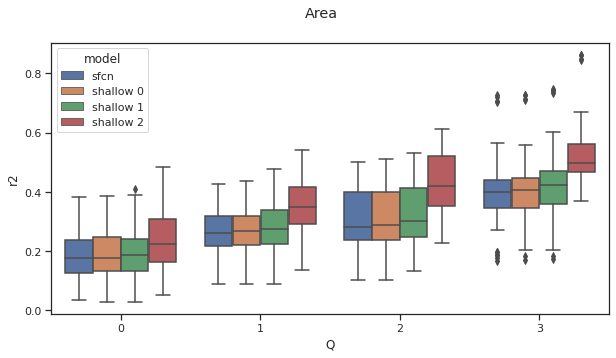

In [51]:
a = boxplot([sfcn, shallow0, shallow1, shallow2], [ 'sfcn', 'shallow 0', 'shallow 1', 'shallow 2'], group='area', title='Area')

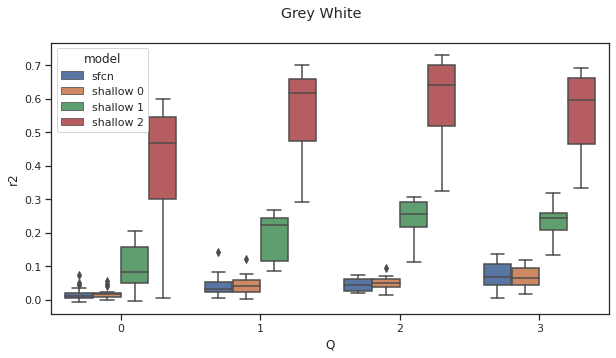

In [52]:
a = boxplot([sfcn, shallow0, shallow1, shallow2], [ 'sfcn', 'shallow 0', 'shallow 1', 'shallow 2'], group='grey white', title='Grey White')

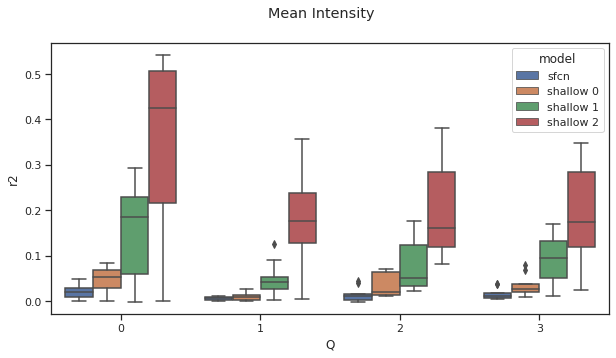

In [53]:
a = boxplot([sfcn, shallow0, shallow1, shallow2], [ 'sfcn', 'shallow 0', 'shallow 1', 'shallow 2'], group='mean intensity', title='Mean Intensity')

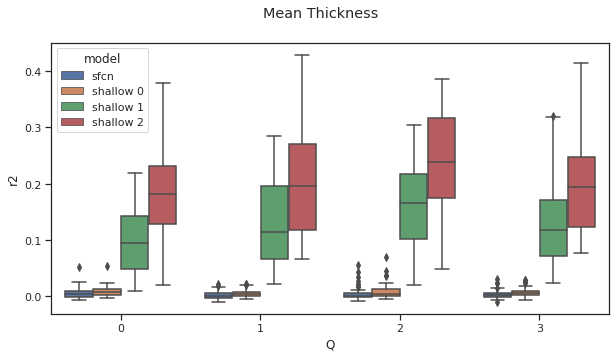

In [54]:
a = boxplot([sfcn, shallow0, shallow1, shallow2], [ 'sfcn', 'shallow 0', 'shallow 1', 'shallow 2'], group='mean thickness', title='Mean Thickness')

In [55]:
multi_r2 = 'sfcn_glomax_test_multi_r2.csv'
multi_mse = 'sfcn_glomax_test_multi_mse.csv'
sfcn_glomax = get_grouped_desc(desc_file, multi_r2, multi_mse)

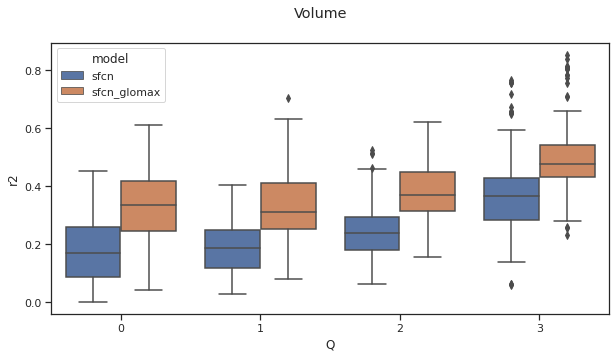

In [56]:
a = boxplot([sfcn, sfcn_glomax], [ 'sfcn', 'sfcn_glomax'], title='Volume')

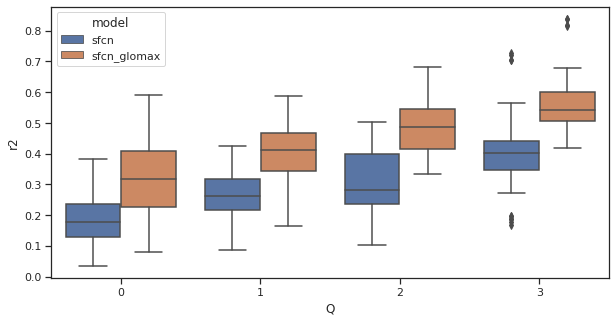

In [57]:
a = boxplot([sfcn, sfcn_glomax], [ 'sfcn', 'sfcn_glomax'], group='area')

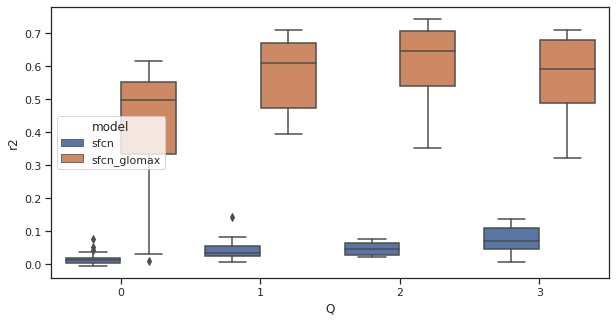

In [58]:
a = boxplot([sfcn, sfcn_glomax], [ 'sfcn', 'sfcn_glomax'], group='grey white')

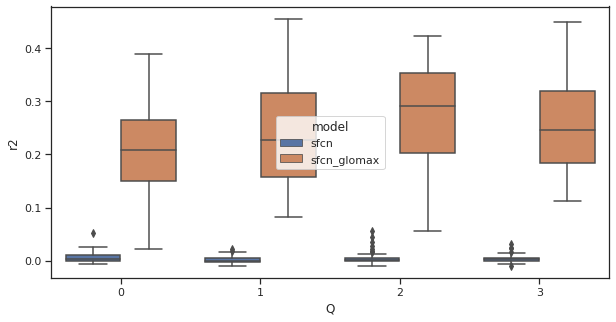

In [59]:
a = boxplot([sfcn, sfcn_glomax], [ 'sfcn', 'sfcn_glomax'], group='mean thickness')

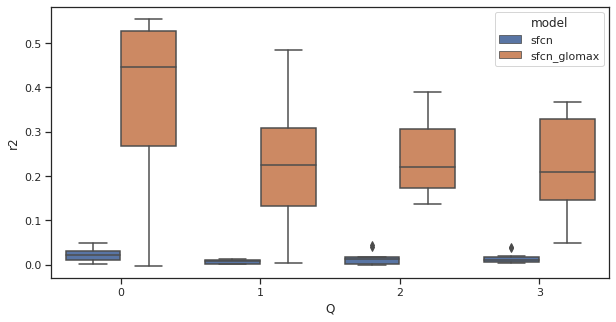

In [60]:
a = boxplot([sfcn, sfcn_glomax], [ 'sfcn', 'sfcn_glomax'], group='mean intensity')

In [61]:
multi_r2 = 'sfcn_deeper_k2_glomax_test_multi_r2.csv'
multi_mse = 'sfcn_deeper_k2_glomax_test_multi_mse.csv'
sfcn_deeper_glomax = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [62]:
multi_r2 = 'sfcn_large_nfil_shallow_0_max_qn_test_multi_r2.csv'
multi_mse = 'sfcn_large_nfil_shallow_0_max_qn_test_multi_mse.csv'
sfcn_shallow_glomax = get_grouped_desc(desc_file, multi_r2, multi_mse)

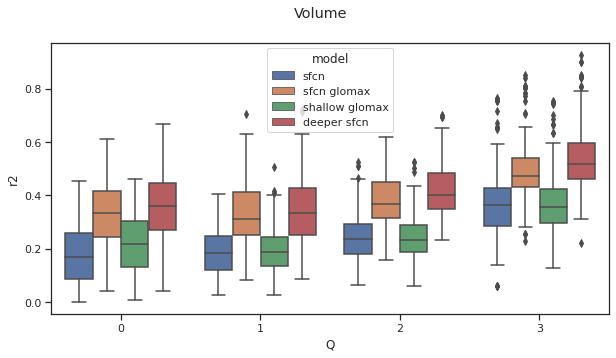

In [63]:
a = boxplot([sfcn, sfcn_glomax, sfcn_shallow_glomax, sfcn_deeper_glomax], [ 'sfcn', 'sfcn glomax', 'shallow glomax', 'deeper sfcn'], title='Volume')

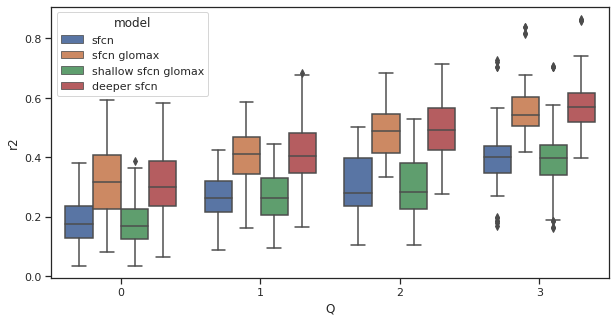

In [64]:
a = boxplot([sfcn, sfcn_glomax, sfcn_shallow_glomax, sfcn_deeper_glomax], [ 'sfcn', 'sfcn glomax', 'shallow sfcn glomax', 'deeper sfcn'], group='area')

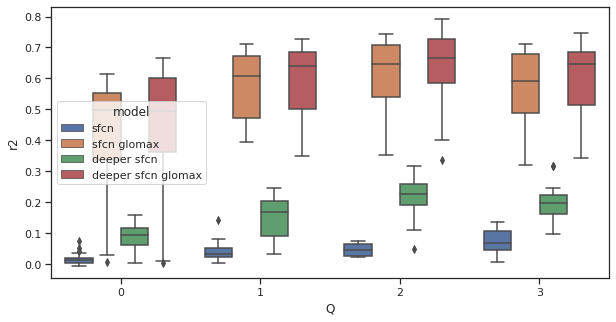

In [65]:
a = boxplot([sfcn, sfcn_glomax, sfcn_shallow_glomax, sfcn_deeper_glomax], [ 'sfcn', 'sfcn glomax', 'deeper sfcn', 'deeper sfcn glomax'], group='grey white')

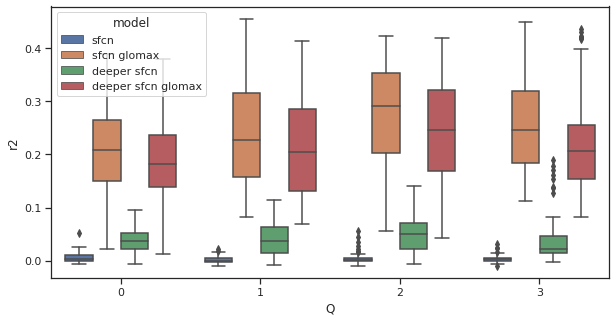

In [66]:
a = boxplot([sfcn, sfcn_glomax, sfcn_shallow_glomax, sfcn_deeper_glomax], [ 'sfcn', 'sfcn glomax', 'deeper sfcn', 'deeper sfcn glomax'], group='mean thickness')

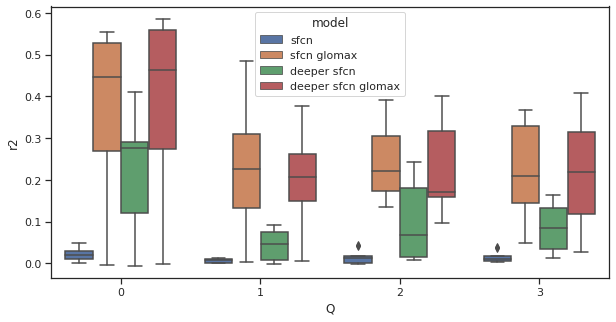

In [67]:
a = boxplot([sfcn, sfcn_glomax, sfcn_shallow_glomax, sfcn_deeper_glomax], [ 'sfcn', 'sfcn glomax', 'deeper sfcn', 'deeper sfcn glomax'], group='mean intensity')

In [68]:
multi_r2 = 'sfcn_large_nfil_shallow_ds_max_qn_test_multi_r2.csv'
multi_mse = 'sfcn_large_nfil_shallow_ds_max_qn_test_multi_mse.csv'
ds_shallow = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [69]:
multi_r2 = 'sfcn_large_nfil_shallow_0_max_qn_test_multi_r2.csv'
multi_mse = 'sfcn_large_nfil_shallow_0_max_qn_test_multi_mse.csv'
shallow_sfcn = get_grouped_desc(desc_file, multi_r2, multi_mse)

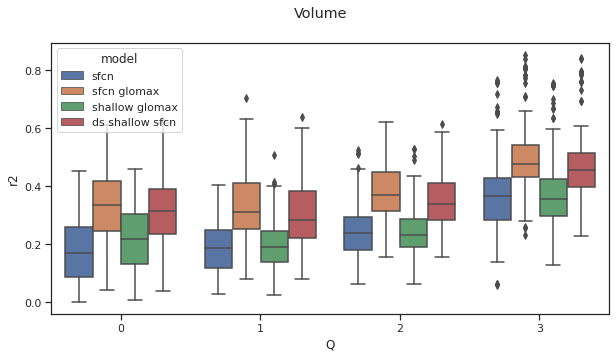

In [70]:
a = boxplot([sfcn, sfcn_glomax, sfcn_shallow_glomax, ds_shallow], [ 'sfcn', 'sfcn glomax', 'shallow glomax', 'ds shallow sfcn'], title='Volume')

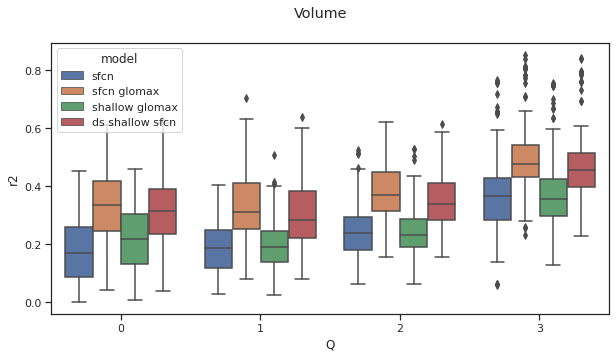

In [71]:
a = boxplot([sfcn, sfcn_glomax, sfcn_shallow_glomax, ds_shallow], [ 'sfcn', 'sfcn glomax', 'shallow glomax', 'ds shallow sfcn'], title='Volume')

In [72]:
multi_r2 = 'sfcn_layer_norm_test_multi_r2.csv'
multi_mse = 'sfcn_layer_norm_test_multi_mse.csv'
sfcn_layernorm = get_grouped_desc(desc_file, multi_r2, multi_mse)

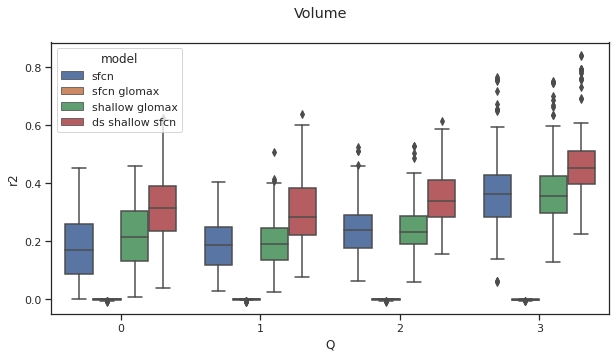

In [73]:
a = boxplot([sfcn, sfcn_layernorm, sfcn_shallow_glomax, ds_shallow], [ 'sfcn', 'sfcn glomax', 'shallow glomax', 'ds shallow sfcn'], title='Volume')

In [78]:
multi_r2 = 'sfcn_group_norm8_test_multi_r2.csv'
multi_mse = 'sfcn_group_norm8_test_multi_mse.csv'
sfcn_norm8 = get_grouped_desc(desc_file, multi_r2, multi_mse)

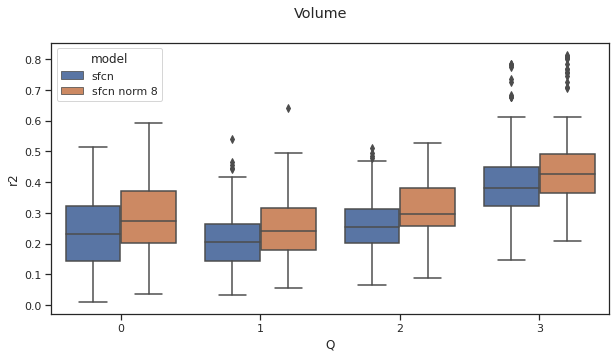

In [79]:
a = boxplot([sfcn, sfcn_norm8], [ 'sfcn', 'sfcn group norm 8'], title='Volume')

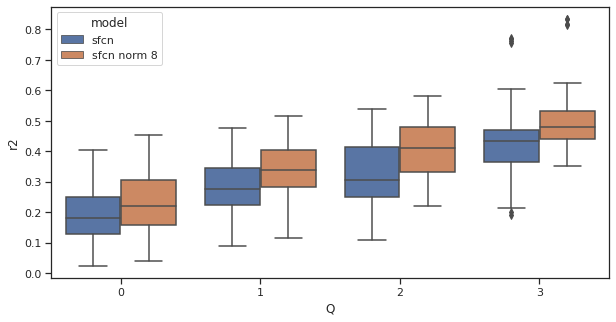

In [83]:
a = boxplot([sfcn, sfcn_norm8], [ 'sfcn', 'sfcn group norm 8'], group='area')

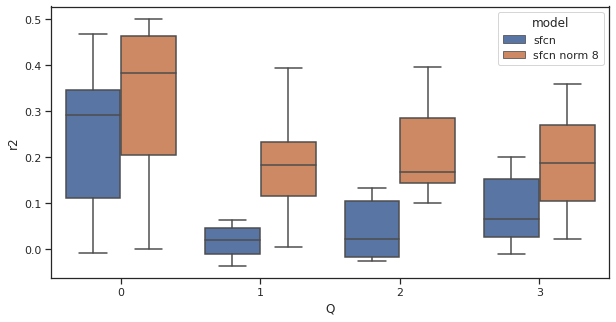

In [89]:
a = boxplot([sfcn, sfcn_norm8], [ 'sfcn', 'sfcn group norm 8'], group='mean intensity')

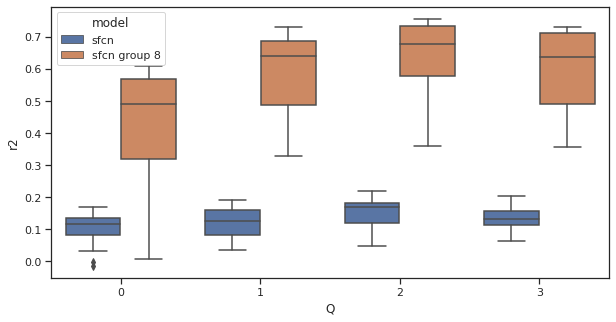

In [90]:
a = boxplot([sfcn, sfcn_norm8], [ 'sfcn', 'sfcn group norm 8'], group='grey white')

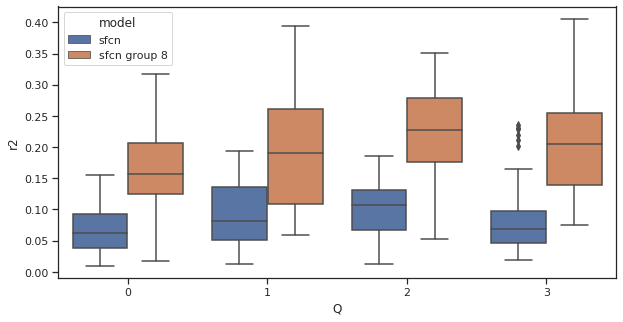

In [91]:
a = boxplot([sfcn, sfcn_norm8], [ 'sfcn', 'sfcn group 8'], group='mean thickness')